Using backend: paddle
Other supported backends: tensorflow.compat.v1, tensorflow, pytorch, jax.
paddle supports more examples now and is recommended.


Compiling model...
'compile' took 0.000212 s

Training model...

Step      Train loss              Test loss               Test metric   
0         [4.20e+01, 3.05e-01]    [4.75e+01, 3.05e-01]    [6.97e-01]    
1000      [2.48e-04, 4.23e-07]    [2.27e-04, 4.23e-07]    [4.80e-04]    
2000      [3.14e-04, 1.19e-05]    [2.57e-04, 1.19e-05]    [2.93e-03]    
3000      [2.34e-03, 2.18e-04]    [1.52e-03, 2.18e-04]    [1.33e-02]    
4000      [7.19e-04, 3.98e-05]    [5.48e-04, 3.98e-05]    [5.91e-03]    
5000      [1.16e-05, 1.53e-08]    [2.54e-05, 1.53e-08]    [1.28e-04]    
6000      [8.41e-06, 7.10e-09]    [2.28e-05, 7.10e-09]    [1.36e-04]    
7000      [1.64e-04, 1.65e-05]    [1.82e-04, 1.65e-05]    [4.80e-03]    
8000      [1.23e-04, 5.95e-06]    [1.40e-04, 5.95e-06]    [2.94e-03]    
9000      [7.04e-06, 5.96e-09]    [1.99e-05, 5.96e-09]    [1.67e-04]    
10000     [6.56e-06, 1.42e-09]    [2.34e-05, 1.42e-09]    [1.29e-04]    
11000     [2.92e-04, 1.03e-05]    [2.55e-04, 1.03e-05]    [

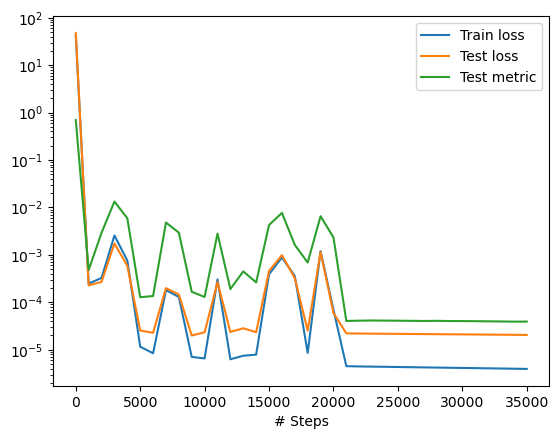

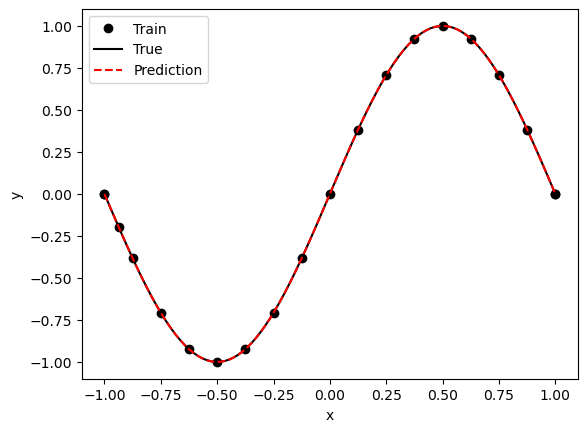

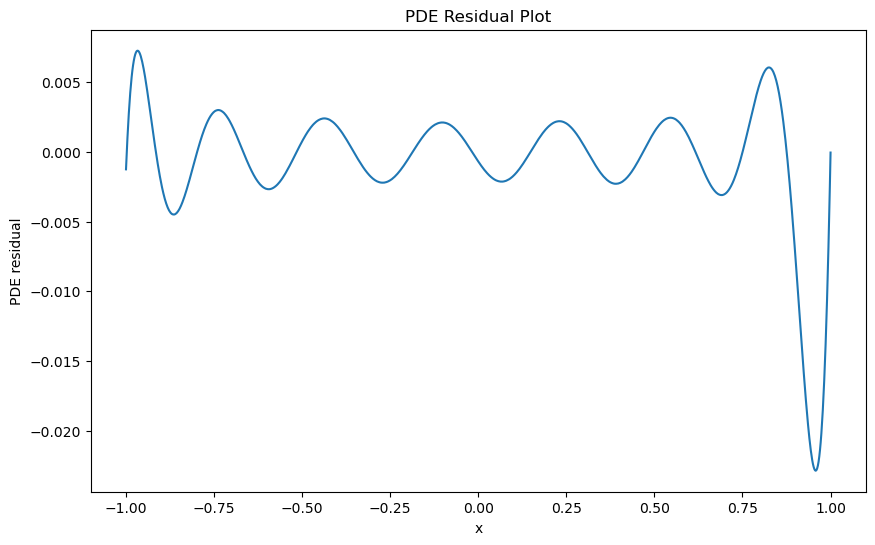

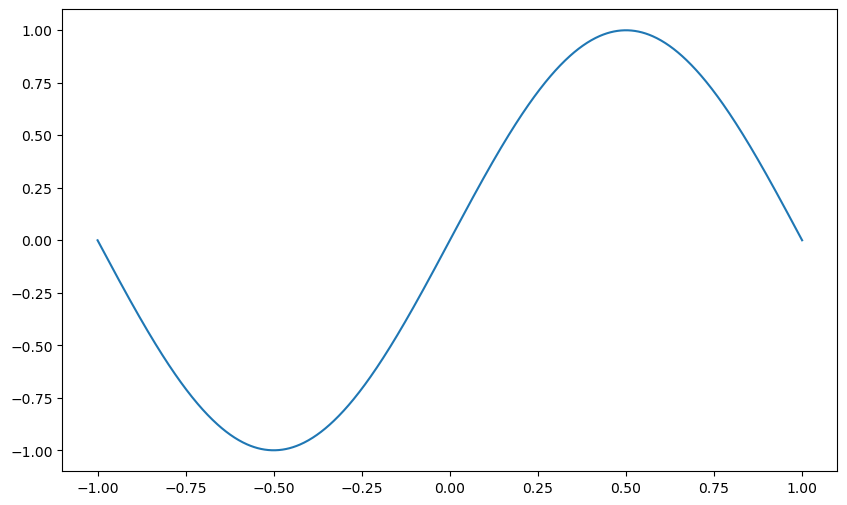

In [1]:
import paddle
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np

def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    return -dy_xx - np.pi ** 2 * paddle.sin(np.pi * x)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

layer_size = [1] + [50] * 3 + [1]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])
model.train(iterations=20000)
model.compile("L-BFGS", lr=0.001, metrics=["l2 relative error"])
losshistory, train_state = model.train()

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure(figsize=(10, 6))
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.title("PDE Residual Plot")
plt.show()

import sympy as sp

x, y = sp.symbols('x y')

f = -sp.pi**2 * sp.sin(sp.pi * x)

sp.integrate(sp.integrate(-sp.pi**2 * sp.sin(sp.pi * x)))

x = geom.uniform_points(1000, True)
plt.figure(figsize=(10, 6))
plt.plot(x, np.sin(np.pi*x))



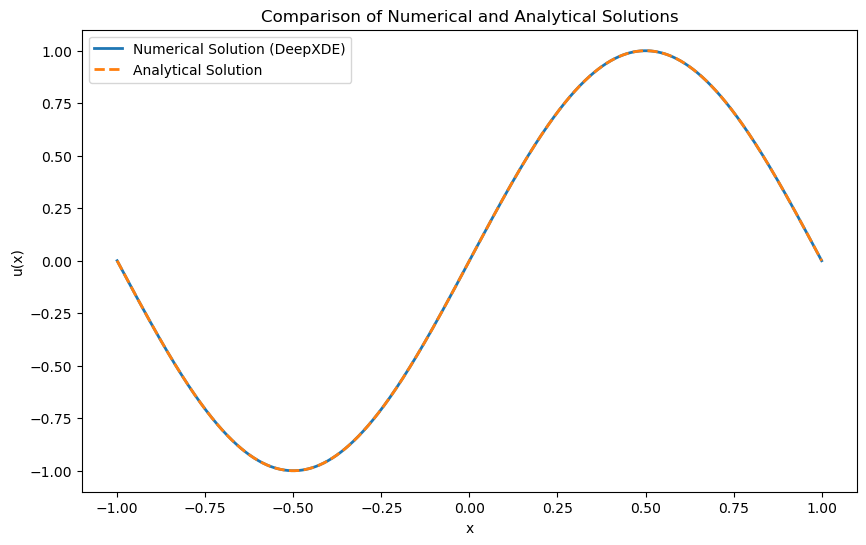

In [3]:
# Analytical solution
y_analytical = np.sin(np.pi * x)
y = model.predict(x)
# Plotting numerical solution vs analytical solution
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Numerical Solution (DeepXDE)', linewidth=2)
plt.plot(x, y_analytical, label='Analytical Solution', linestyle='dashed', linewidth=2)
plt.xlabel('x')
plt.ylabel('u(x)')
plt.title('Comparison of Numerical and Analytical Solutions')
plt.legend()
plt.show()